In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv(r'C:\Users\samee\Google Drive\Carolina Data Challenge\NCHS_-_Leading_Causes_of_Death__United_States.csv')

In [43]:
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


In [60]:
df2 = df[df['Cause Name'] != 'All causes']

C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


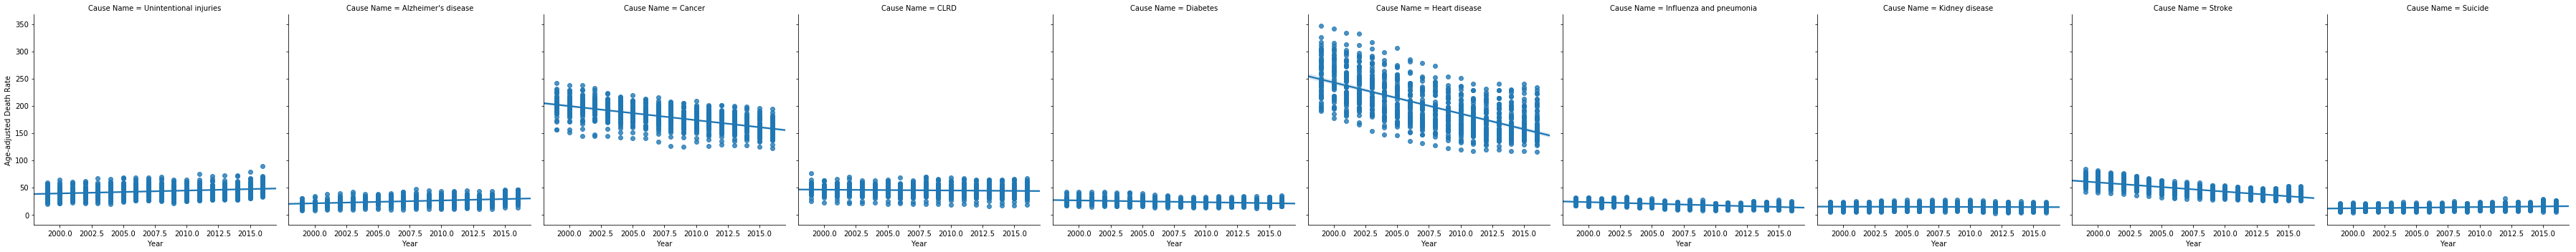

In [61]:
sns.lmplot(x='Year',y='Age-adjusted Death Rate',data=df2,col='Cause Name')

In [62]:
allcauses = df[df['Cause Name'] == 'All causes']

In [66]:
allcauses.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
36,2006,All Causes,All causes,Alaska,3354,787.6
52,2016,All Causes,All causes,Alabama,52466,920.4
53,2015,All Causes,All causes,Alabama,51909,924.5
54,2014,All Causes,All causes,Alabama,50215,909.1
55,2013,All Causes,All causes,Alabama,50189,925.2


C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


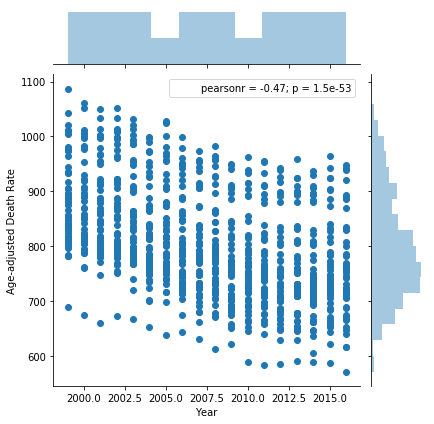

In [67]:
sns.jointplot(x='Year', y='Age-adjusted Death Rate', data=allcauses)

In [75]:
df['Cause Name'].unique()

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Cancer', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Kidney disease', 'Stroke', 'Suicide'],
      dtype=object)

In [180]:
allc = df[df['Cause Name'] == 'All causes']
unint = df[df['Cause Name'] == 'Unintentional injuries']
alz = df[df['Cause Name'] == "Alzheimer's disease"]
cancer = df[df['Cause Name'] == 'Cancer']
clrd = df[df['Cause Name'] == "CLRD"]
diabetes = df[df['Cause Name'] == "Diabetes"]
heart = df[df['Cause Name'] == "Heart disease"]
influenza = df[df['Cause Name'] == "Influenza and pneumonia"]
kidney = df[df['Cause Name'] == "Kidney disease"]
stroke = df[df['Cause Name'] == "Stroke"]
suicide = df[df['Cause Name'] == "Suicide"]

In [90]:
unint.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


# Start with unintentional causes

[-1003.98845273]
[[0.52167321]]
7.650949215641035
94.06614171073485
9.698770113304823


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


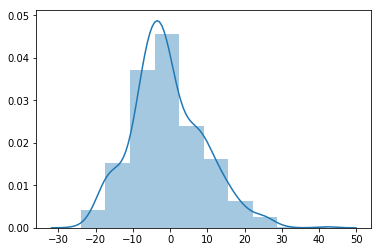

In [136]:
X = unint['Year']
y = unint['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[17216.46989199]
[[-8.17933945]]
71.20270928106612
7891.171136684514
88.83226405245176


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


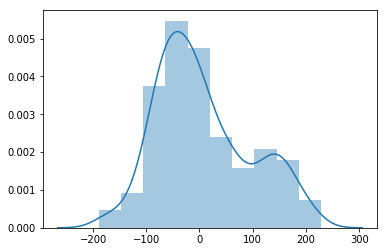

In [181]:
X = allc['Year']
y = allc['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[-811.17078822]
[[0.41606881]]
5.251257168888944
45.555359662876135
6.749471065415136


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


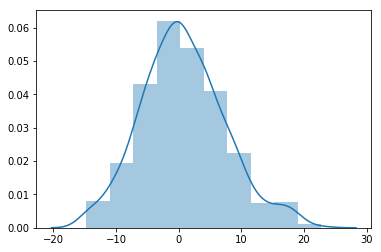

In [182]:
X = alz['Year']
y = alz['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[5163.24389368]
[[-2.48294559]]
12.461065645280229
260.61039487862547
16.143431942391476


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


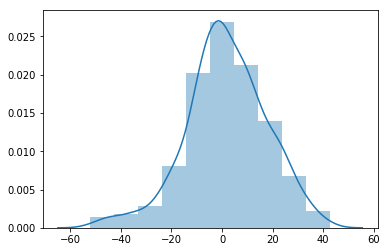

In [183]:
X = cancer['Year']
y = cancer['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[383.53334248]
[[-0.16867699]]
7.037953376863864
84.83662737297024
9.210680071144054


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


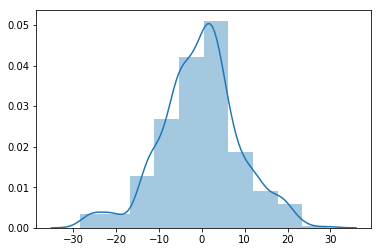

In [184]:
X = clrd['Year']
y = clrd['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[678.86016978]
[[-0.32662369]]
3.503380067601272
21.59991423710236
4.647570788821012


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


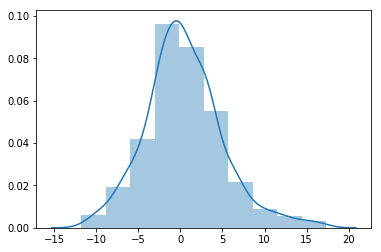

In [185]:
X = diabetes['Year']
y = diabetes['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[10748.85008236]
[[-5.25482869]]
28.03850744403835
1157.5251184729516
34.02242082029072


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


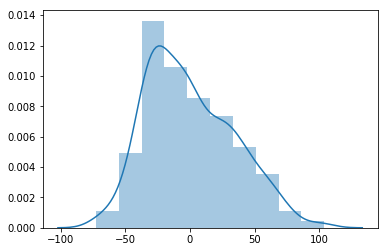

In [186]:
X = heart['Year']
y = heart['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[1189.78738972]
[[-0.58340919]]
3.1869381039070093
15.692953288287416
3.9614332366313354


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


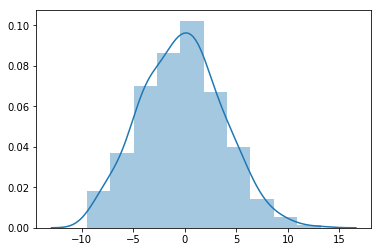

In [187]:
X = influenza['Year']
y = influenza['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[140.12293582]
[[-0.06281374]]
3.974405145287224
23.48589110628689
4.84622441765617


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


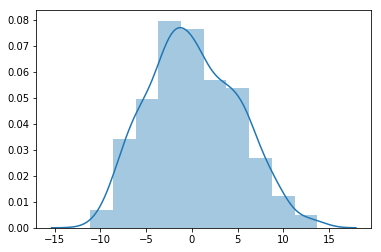

In [189]:
X = kidney['Year']
y = kidney['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[3443.62658063]
[[-1.69258775]]
6.042120832081112
57.67829794715673
7.594622962804456


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


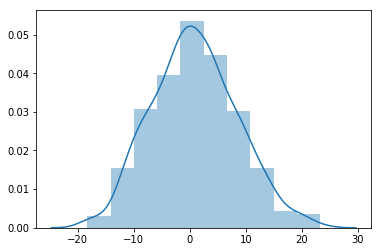

In [190]:
X = stroke['Year']
y = stroke['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[-446.70630035]
[[0.229139]]
2.79061362428879
13.575142995317591
3.684446090705846


C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


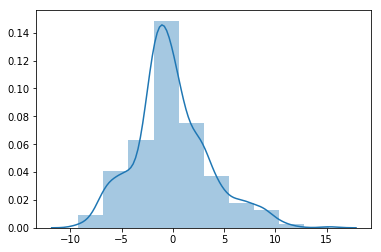

In [188]:
X = suicide['Year']
y = suicide['Age-adjusted Death Rate']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
print(lm.intercept_)
print(lm.coef_)
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions), bins=10)
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


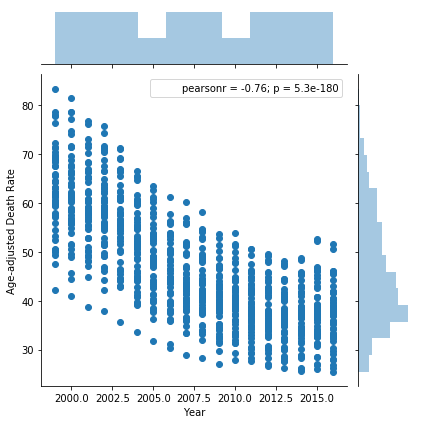

In [193]:
sns.jointplot(x='Year', y='Age-adjusted Death Rate', data=stroke)

C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


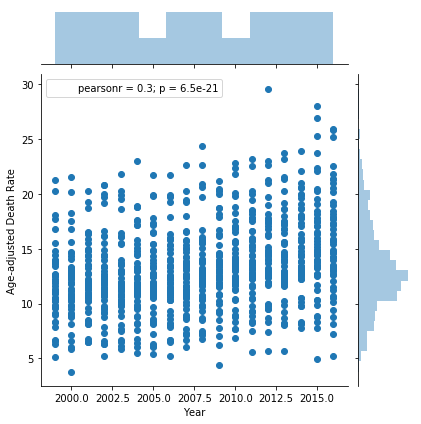

In [194]:
sns.jointplot(x='Year', y='Age-adjusted Death Rate', data=suicide)

C:\Users\samee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\samee\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


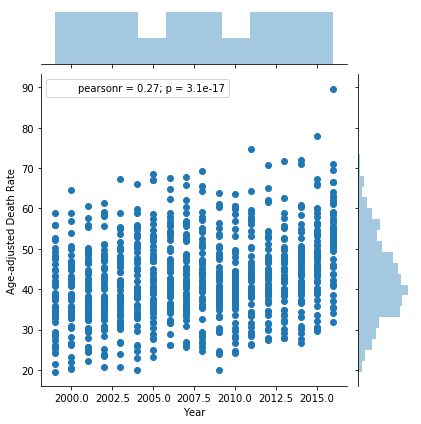

In [195]:
sns.jointplot(x='Year', y='Age-adjusted Death Rate', data=unint)